In [2]:
print("hello mother")

hello mother


In [3]:
from PIL import Image
import numpy as np

def convert_to_grayscale_and_resize(image_path, new_size=(625, 100)):
    with Image.open(image_path) as img:
        
        # Convert the image to grayscale
        img_gray = img.convert("L")
        img_resized = img_gray.resize(new_size, Image.Resampling.LANCZOS)
        image_array = np.array(img_resized)
        
        return image_array


In [4]:
import cv2
import numpy as np
from scipy.ndimage import zoom

def resize_array(array, new_size):
    original_size = array.shape
    scale = [n / o for n, o in zip(new_size, original_size)]
    
    resized_array = zoom(array, zoom=scale, order=1)  

    return resized_array

def mask_generator(tags, image_path):
    en_pix = tags.split()
    rle = list(map(int, en_pix))
    pixel = [rle[i] for i in range(0, len(rle), 2)]
    pixel_count = [rle[i] for i in range(1, len(rle), 2)]
    
    # Generate RLE pixels
    rle_pixels = [list(range(pixel[i], pixel[i] + pixel_count[i])) for i in range(len(pixel))]
    rle_mask_pixels = sum(rle_pixels, [])
    
    img = cv2.imread(image_path)
    if img is None:
        raise ValueError(f"Image not found at {image_path}")
    
    # Get image dimensions
    l, b, _ = img.shape
    max_index = l * b - 1
    rle_mask_pixels = [min(pixel, max_index) for pixel in rle_mask_pixels] 
    mask_img = np.zeros((l * b,), dtype=np.uint8)
    
    # Set pixels of interest to 1 (instead of 100)
    mask_img[rle_mask_pixels] = 1
    
    mask = mask_img.reshape((b, l)).T
    
    new_size = (625, 100)
    resized_array = cv2.resize(mask, new_size)
    
    return resized_array


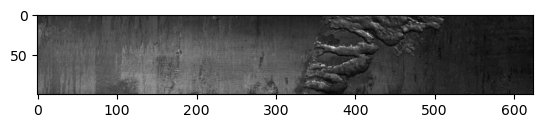

In [5]:
from matplotlib import pyplot
img = convert_to_grayscale_and_resize("Datasets/Severstal steel defect detection/train_images/0030401a5.jpg", new_size=(625, 100))
pyplot.imshow(img, cmap=pyplot.get_cmap('gray'))


In [6]:
import pandas as pd
CSV_PATH = "/Users/srijanchaudhary/Desktop/projects&shit/Machine Learning Concepts/Datasets/Severstal steel defect detection/train.csv"
data = pd.read_csv(CSV_PATH, header=None)
image_path = data[0]
image_enpix = [f"Datasets/Severstal steel defect detection/train_images/{image_name}" for image_name in data[0]]
train_x = np.array(image_enpix)
train_y= np.array(data[2])
image_dataset = np.delete(train_x, 0)
damage_dataset = np.delete(train_y, 0)
train_y = [mask_generator(damage, image) for damage, image in zip(damage_dataset, image_dataset)]

In [7]:
train_x = [convert_to_grayscale_and_resize(image_path, new_size=(625, 100)) for image_path in image_dataset]

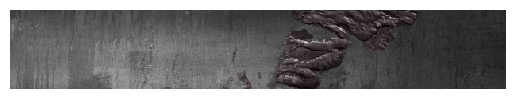

In [8]:
import numpy as np
import matplotlib.pyplot as plt


plt.imshow(train_x[10], cmap='gray', interpolation='none')

plt.imshow(train_y[10], cmap='Reds', interpolation='none', alpha=0.09) 

plt.axis('off')

plt.show()



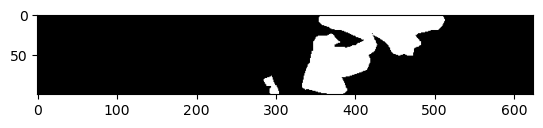

In [9]:
plt.imshow(train_y[10], cmap = "grey")


In [10]:
print(train_y[0][0])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [11]:
print(train_x[0][0])

[ 66  67  71  80  86  65  58  63  72  77  76  74  66  67  67  62  62  67
  68  58  62  65  60  60  89  78  64  66  67  69  71  73  70  62  63  68
  71  69  70  77  75  80  75  70  70  76  69  69  69  70  68  69  67  65
  68  55  58  65  81  65  60  65  64  61  58  57  62  60  66  64  77  69
  70  75  67  69  70  76  76  86  72  76  79  81  80  78  85  79  74  69
  79  66  61  71  61  60  59  69  72  76  70  58  69  81  83  74  69  73
  74  82  81  80  82  73  78  70  74  85  84  82  80  78  69  62  75  86
  69  79  84  71  71  78  64  68  71  74  76  70  67  69  77  66  67  63
  59  52  59  61  61  69  64  57  58  62  63  60  57  62  63  62  59  61
  54  54  57  55  59  56  56  64  61  58  57  61  56  61  66  54  57  58
  70  60  55  60  59  54  54  57  57  68  66  59  64  56  59  52  54  57
  63  58  64  60  66  62  57  58  54  56  59  56  54  56  64  60  57  53
  54  55  60  58  56  55  59  62  58  59  58  59  56  60  62  59  63  63
  58  65  66  61  61  66  64  59  55  60  59  53  5

In [12]:
import numpy as np

def normalize_images(train_x):
    train_x = np.array(train_x, dtype=np.float32)
    train_x = train_x / 255.0
    
    return train_x

train_x = normalize_images(train_x)



In [13]:
print(train_x[0][0])

[0.25882354 0.2627451  0.2784314  0.3137255  0.3372549  0.25490198
 0.22745098 0.24705882 0.28235295 0.3019608  0.29803923 0.2901961
 0.25882354 0.2627451  0.2627451  0.24313726 0.24313726 0.2627451
 0.26666668 0.22745098 0.24313726 0.25490198 0.23529412 0.23529412
 0.34901962 0.30588236 0.2509804  0.25882354 0.2627451  0.27058825
 0.2784314  0.28627452 0.27450982 0.24313726 0.24705882 0.26666668
 0.2784314  0.27058825 0.27450982 0.3019608  0.29411766 0.3137255
 0.29411766 0.27450982 0.27450982 0.29803923 0.27058825 0.27058825
 0.27058825 0.27450982 0.26666668 0.27058825 0.2627451  0.25490198
 0.26666668 0.21568628 0.22745098 0.25490198 0.31764707 0.25490198
 0.23529412 0.25490198 0.2509804  0.23921569 0.22745098 0.22352941
 0.24313726 0.23529412 0.25882354 0.2509804  0.3019608  0.27058825
 0.27450982 0.29411766 0.2627451  0.27058825 0.27450982 0.29803923
 0.29803923 0.3372549  0.28235295 0.29803923 0.30980393 0.31764707
 0.3137255  0.30588236 0.33333334 0.30980393 0.2901961  0.2705882

In [14]:
print(len(train_y))
print(train_y[0].shape)
print(len(train_x))
print(train_x[0].shape)

7095
(100, 625)
7095
(100, 625)


In [15]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Conv2DTranspose, concatenate, Cropping2D
from tensorflow.keras.callbacks import History

# Define the U-Net model
def unet_model(input_shape=(100, 625, 1)):
    inputs = Input(shape=input_shape)

    # Contracting path (Downsampling)
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    # Bottleneck
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1)
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv2)

    # Expansive path (Upsampling)
    up1 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(conv2)

    # Cropping conv1 to match the shape of up1
    cropped_conv1 = Cropping2D(cropping=((0, 0), (0, 1)))(conv1)

    # Skip connection with cropped conv1
    up1 = concatenate([up1, cropped_conv1])

    conv3 = Conv2D(32, (3, 3), activation='relu', padding='same')(up1)
    conv3 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv3)

    # Output layer (Sigmoid for binary segmentation)
    outputs = Conv2D(1, (1, 1), activation='sigmoid')(conv3)

    model = Model(inputs=[inputs], outputs=[outputs])
    return model

# Compile the model
model = unet_model()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()




Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 100, 625,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 100, 625,  │        320 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 100, 625,  │      9,248 │ conv2d[0][0]      │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 50, 312,   │          0 │ conv2d_1[0][0]    │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 50, 312,   │     18,496 │ max_pooling2d[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 50, 312,   │     36,928 │ conv2d_2[0][0]    │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_transpose    │ (None, 100, 624,  │      8,224 │ conv2d_3[0][0]    │
│ (Conv2DTranspose)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ cropping2d          │ (None, 100, 624,  │          0 │ conv2d_1[0][0]    │
│ (Cropping2D)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 100, 624,  │          0 │ conv2d_transpose… │
│ (Concatenate)       │ 64)               │            │ cropping2d[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 100, 624,  │     18,464 │ concatenate[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 100, 624,  │      9,248 │ conv2d_4[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 100, 624,  │         33 │ conv2d_5[0][0]    │
│                     │ 1)                │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 100,961 (394.38 KB)

 Trainable params: 100,961 (394.38 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
27/27 ━━━━━━━━━━━━━━━━━━━━ 119s 4s/step - accuracy: 0.8229 - loss: 0.5063 - val_accuracy: 0.9583 - val_loss: 0.1986
Epoch 2/5
27/27 ━━━━━━━━━━━━━━━━━━━━ 119s 4s/step - accuracy: 0.9462 - loss: 0.2218 - val_accuracy: 0.9583 - val_loss: 0.1720
Epoch 3/5
27/27 ━━━━━━━━━━━━━━━━━━━━ 126s 5s/step - accuracy: 0.9462 - loss: 0.2036 - val_accuracy: 0.9583 - val_loss: 0.1667
Epoch 4/5
27/27 ━━━━━━━━━━━━━━━━━━━━ 115s 4s/step - accuracy: 0.9436 - loss: 0.2030 - val_accuracy: 0.9583 - val_loss: 0.1546
Epoch 5/5
27/27 ━━━━━━━━━━━━━━━━━━━━ 117s 4s/step - accuracy: 0.9482 - loss: 0.1784 - val_accuracy: 0.9605 - val_loss: 0.1910


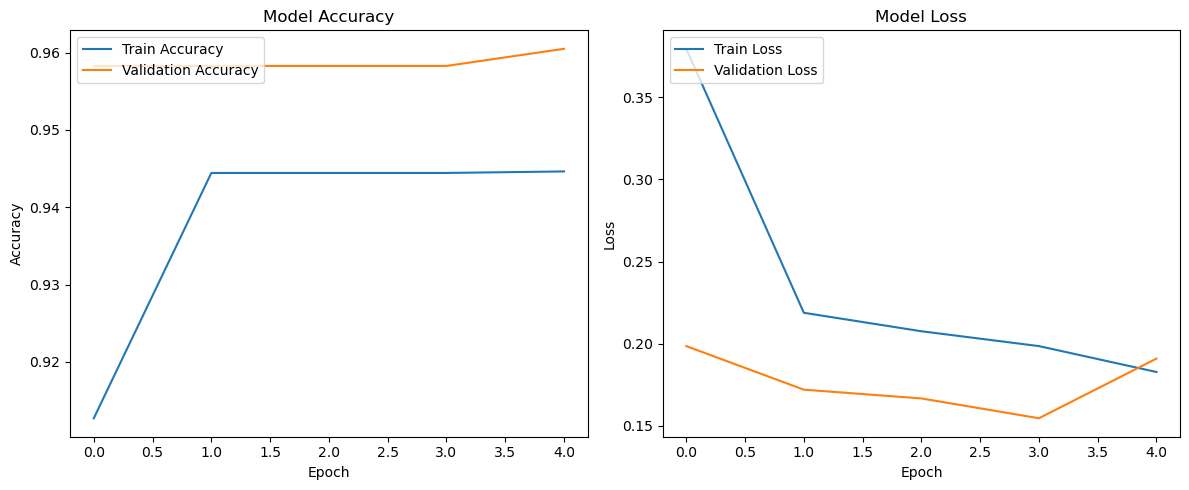

In [16]:

# Convert lists to NumPy arrays
train_x1 = np.array(train_x)
train_y1 = np.array(train_y)

# Reshape your data to fit the model
train_x2 = train_x1.reshape(-1, 100, 625, 1)
train_y2 = train_y1.reshape(-1, 100, 625, 1)

# Crop train_y_subset to match the output shape (100, 624, 1)
train_x_subset = train_x2[:1000]
train_y_subset = train_y2[:1000, :, :624, :]  # Crop width to 624

# Split the dataset into training and validation sets
split_index = int(0.8 * len(train_x_subset))
train_x, val_x = train_x_subset[:split_index], train_x_subset[split_index:]
train_y, val_y = train_y_subset[:split_index], train_y_subset[split_index:]

# Train the model and capture the history
history = model.fit(train_x, train_y, validation_data=(val_x, val_y), batch_size=30, epochs=5)

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
[[0.20560153]
 [0.10861181]
 [0.09189403]
 [0.09307083]
 [0.09649112]
 [0.10317127]
 [0.10488854]
 [0.10825934]
 [0.10719907]
 [0.108662  ]
 [0.10723604]
 [0.10890375]
 [0.10764246]
 [0.10930716]
 [0.10788605]
 [0.10946029]
 [0.10801917]
 [0.10976234]
 [0.10847271]
 [0.11039109]
 [0.10904986]
 [0.11066227]
 [0.10896764]
 [0.11046336]
 [0.10909754]
 [0.11100572]
 [0.10988359]
 [0.11181567]
 [0.1106983 ]
 [0.11258205]
 [0.11126652]
 [0.11281108]
 [0.11106667]
 [0.11245732]
 [0.11089369]
 [0.11242664]
 [0.11068861]
 [0.1121792 ]
 [0.11057176]
 [0.11234783]
 [0.11102617]
 [0.11307488]
 [0.1116733 ]
 [0.11347206]
 [0.11186868]
 [0.11353001]
 [0.11221129]
 [0.11409024]
 [0.11258846]
 [0.11422955]
 [0.11256807]
 [0.11421442]
 [0.11283428]
 [0.11477766]
 [0.11345112]
 [0.115081  ]
 [0.11337892]
 [0.11469325]
 [0.1130532 ]
 [0.11447957]
 [0.11283274]
 [0.11429919]
 [0.11268552]
 [0.11436179]
 [0.11301388]
 [0.11472782]
 [0.11326418]
 [0.11491664]
 [0.11342

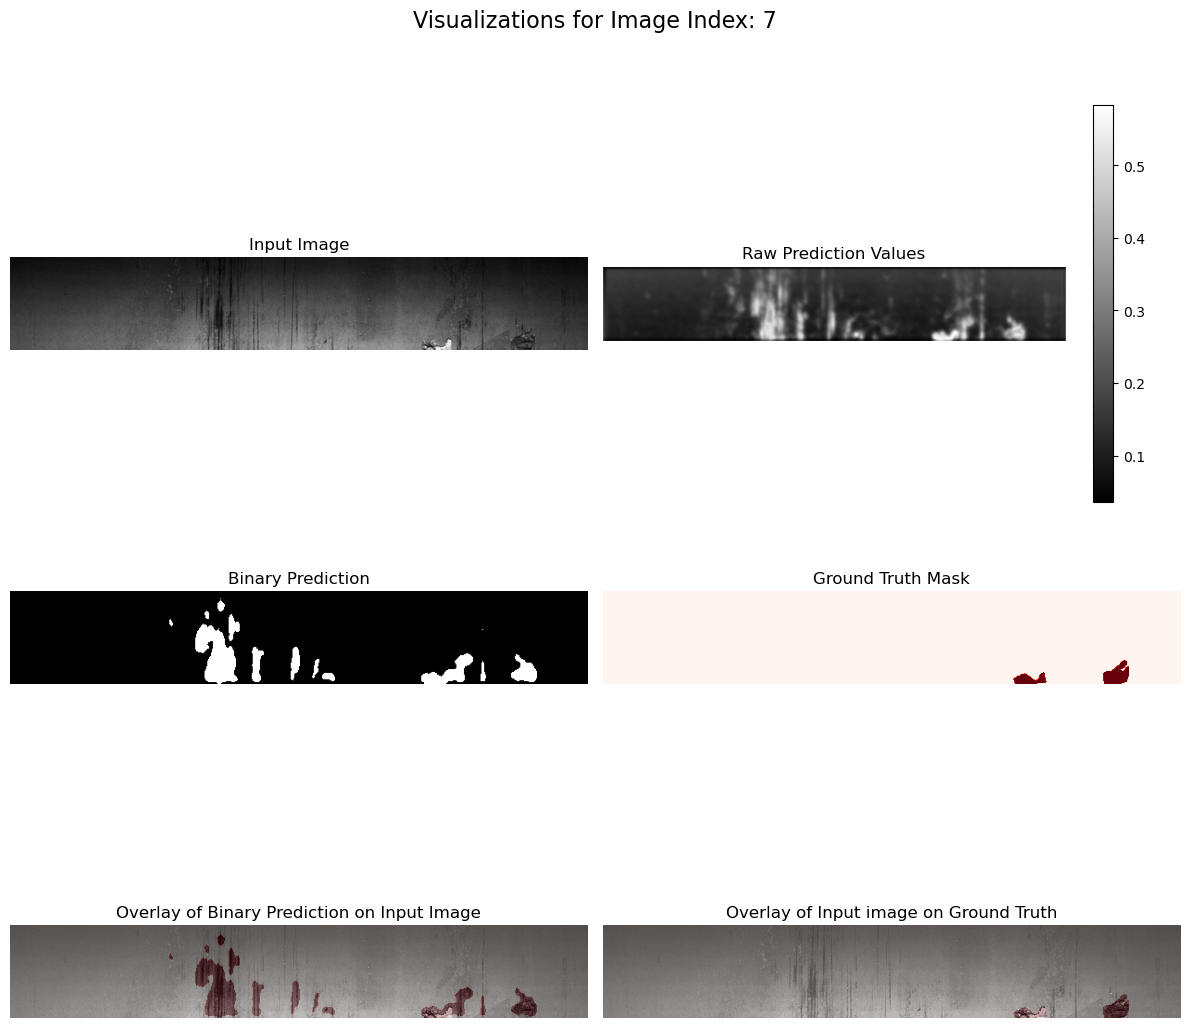

In [44]:
import matplotlib.pyplot as plt
import numpy as np

def visualize_predictions(model, train_x, train_y, index):
    # Prepare the sample input
    sample_input = np.expand_dims(train_x[index], axis=0)  
    
    # Get the prediction
    prediction = model.predict(sample_input)
    print(prediction[0][0])
    
    # Create binary prediction
    binary_prediction = (prediction > 0.3).astype(int)

    # Set up the figure and axes
    fig, axs = plt.subplots(3, 2, figsize=(12, 12))
    fig.suptitle(f"Visualizations for Image Index: {index}", fontsize=16)

    # Input Image
    axs[0, 0].imshow(sample_input.reshape(100, 625), cmap="gray")
    axs[0, 0].set_title("Input Image")
    axs[0, 0].axis('off')

    # Raw Prediction
    raw_pred_img = axs[0, 1].imshow(np.squeeze(prediction), cmap="gray")
    axs[0, 1].set_title("Raw Prediction Values")
    fig.colorbar(raw_pred_img, ax=axs[0, 1])
    axs[0, 1].axis('off')

    # Binary Prediction
    axs[1, 0].imshow(np.squeeze(binary_prediction), cmap="gray")
    axs[1, 0].set_title("Binary Prediction")
    axs[1, 0].axis('off')

    # Ground Truth
    ground_truth = np.squeeze(train_y[index])  # Squeeze to remove the last dimension
    axs[1, 1].imshow(ground_truth, cmap="gray")
    axs[1, 1].set_title("Ground Truth Mask")
    axs[1, 1].axis('off')

    # Overlay Prediction on Input Image
    axs[2, 0].imshow(sample_input.reshape(100, 625), cmap="gray", interpolation='none')
    axs[2, 0].imshow(np.squeeze(binary_prediction), cmap="Reds", alpha=0.3)
    axs[2, 0].set_title("Overlay of Binary Prediction on Input Image")
    axs[2, 0].axis('off')

    # Input image on Ground Truth
    axs[2, 1].imshow(sample_input.reshape(100, 625), cmap="gray", interpolation='none')
    axs[2, 1].imshow(ground_truth, cmap="Reds", alpha=0.3)
    axs[2, 1].set_title("Overlay of Input image on Ground Truth")
    axs[2, 1].axis('off')

    plt.tight_layout()
    plt.subplots_adjust(top=0.9)
    plt.show()

# Example usage
index_to_visualize = 7  # Change this to any index you want to visualize
visualize_predictions(model, train_x, train_y, index_to_visualize)




In [45]:
model.save('unet_model_full.h5', include_optimizer=True)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━

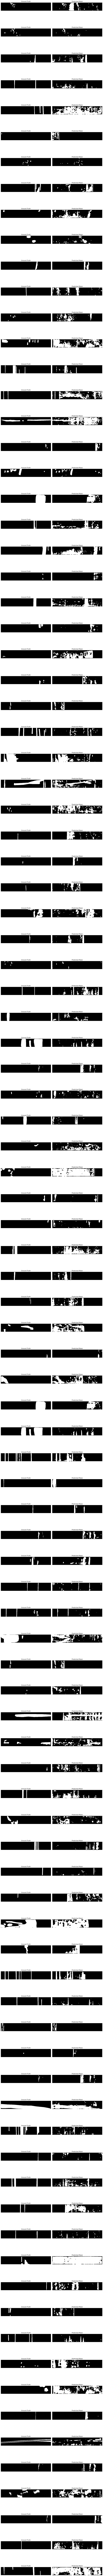

In [18]:
from sklearn.metrics import precision_score, recall_score, f1_score

def visualize_batch_predictions(model, train_x, train_y, batch_size=100):
    predictions = []
    ground_truths = []

    for i in range(batch_size):
        index = np.random.randint(0, len(train_x))  # Randomly select an index
        sample_input = np.expand_dims(train_x[index], axis=0)  
        prediction = model.predict(sample_input)

        # Store the raw and binary predictions
        predictions.append(prediction)

        # Get the ground truth
        ground_truth = train_y[index].squeeze()  # Remove any singleton dimensions
        ground_truths.append(ground_truth)

    # Convert lists to NumPy arrays
    predictions = np.array(predictions)  # Shape (batch_size, 1, 100, 624)
    ground_truths = np.array(ground_truths)  # Shape (batch_size, 100, 625)

    # Reshape predictions to match ground truth shape
    predictions = predictions.reshape(batch_size, 100, 624)

    # Ensure ground truths and predictions have the same last dimension
    if predictions.shape[2] != ground_truths.shape[2]:
        min_width = min(predictions.shape[2], ground_truths.shape[2])
        predictions = predictions[:, :, :min_width]  # Trim predictions if necessary
        ground_truths = ground_truths[:, :, :min_width]  # Trim ground truths if necessary

    # Calculate binary predictions
    binary_predictions = (predictions > 0.2).astype(int)

    # Calculate accuracy, precision, recall, and F1 score
    accuracy = np.mean(binary_predictions == ground_truths)
    precision = precision_score(ground_truths.flatten(), binary_predictions.flatten(), average='binary')
    recall = recall_score(ground_truths.flatten(), binary_predictions.flatten(), average='binary')
    f1 = f1_score(ground_truths.flatten(), binary_predictions.flatten(), average='binary')

    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')

    # Set up the figure for visualizing
    fig, axs = plt.subplots(batch_size, 2, figsize=(12, 3 * batch_size))

    for i in range(batch_size):
        axs[i, 0].imshow(ground_truths[i], cmap="gray")
        axs[i, 0].set_title("Ground Truth")
        axs[i, 0].axis('off')

        axs[i, 1].imshow(binary_predictions[i], cmap="gray")
        axs[i, 1].set_title("Predicted Mask")
        axs[i, 1].axis('off')

    plt.tight_layout()
    plt.show()

# Example usage
visualize_batch_predictions(model, train_x, train_y, batch_size=100)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━

<Figure size 800x600 with 0 Axes>

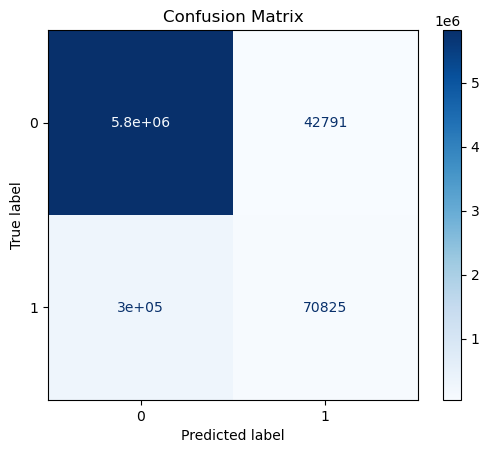

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def plot_confusion_matrix(model, train_x, train_y, batch_size=100):
    # Ensure train_y is a NumPy array
    train_y_array = np.array(train_y)
    
    # Make predictions
    predictions = []
    for i in range(batch_size):
        sample_input = np.expand_dims(train_x[i], axis=0)
        prediction = model.predict(sample_input)
        binary_prediction = (prediction > 0.5).astype(int)
        predictions.append(binary_prediction)

    # Convert to a single array
    predictions = np.array(predictions).reshape(batch_size, -1)
    
    # Reshape ground truths to match predictions
    ground_truths = train_y_array[:batch_size].reshape(batch_size, -1)

    # Make sure both predictions and ground truths have the same shape
    if predictions.shape[1] != ground_truths.shape[1]:
        min_length = min(predictions.shape[1], ground_truths.shape[1])
        predictions = predictions[:, :min_length]
        ground_truths = ground_truths[:, :min_length]

    # Calculate confusion matrix
    cm = confusion_matrix(ground_truths.flatten(), predictions.flatten())

    # Create a confusion matrix display
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
    
    # Plotting the confusion matrix
    plt.figure(figsize=(8, 6))
    disp.plot(cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.show()

# Example usage
plot_confusion_matrix(model, train_x, train_y, batch_size=100)



In [20]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model

def get_feature_maps(model, layer_names, input_data):
    # Create a new model that will output the desired layers
    feature_maps_model = Model(inputs=model.input, outputs=[model.get_layer(name).output for name in layer_names])
    
    # Get feature maps for the input data
    feature_maps = feature_maps_model.predict(input_data)
    return feature_maps

def plot_feature_maps(feature_maps, num_columns=4):
    for i, fmap in enumerate(feature_maps):
        num_features = fmap.shape[-1]
        size = fmap.shape[1]  # Assuming square feature maps

        # Create a grid to display the feature maps
        num_rows = num_features // num_columns + (num_features % num_columns > 0)
        plt.figure(figsize=(num_columns * 2, num_rows * 2))

        for j in range(num_features):
            plt.subplot(num_rows, num_columns, j + 1)
            plt.imshow(fmap[0, :, :, j], cmap='gray')
            plt.axis('off')
            plt.title(f'Feature Map {j + 1}')
        
        plt.tight_layout()
        plt.show()

# Example usage
layer_names = ['conv2d_46', 'conv2d_47', 'conv2d_48', 'conv2d_49']  # Use actual layer names from model.summary()
sample_input = np.expand_dims(train_x[10], axis=0)  # Use a sample input (reshaped)
feature_maps = get_feature_maps(model, layer_names, sample_input)
plot_feature_maps(feature_maps)



ValueError: No such layer: conv2d_46. Existing layers are: ['input_layer', 'conv2d', 'conv2d_1', 'max_pooling2d', 'conv2d_2', 'conv2d_3', 'conv2d_transpose', 'cropping2d', 'concatenate', 'conv2d_4', 'conv2d_5', 'conv2d_6'].

In [42]:
model.save('unet_model.h5')
